In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.utils import to_categorical

# A. Setup

11490434/11490434 [==============================] - 1s 0us/step


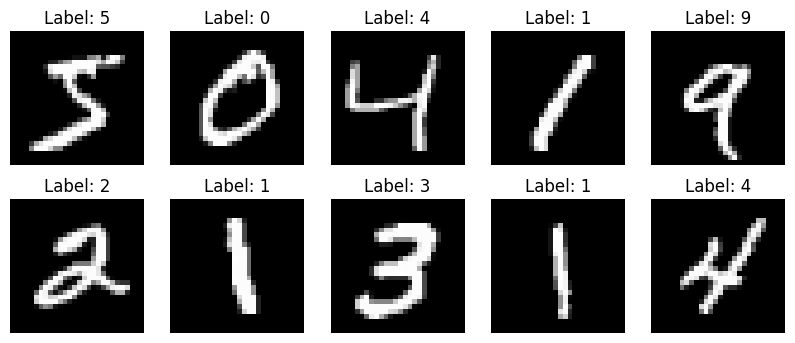

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


In [2]:
# Load Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display the first 10 images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

# Print the shapes
print(f'Training images shape: {train_images.shape}')
print(f'Training labels shape: {train_labels.shape}')
print(f'Testing images shape: {test_images.shape}')
print(f'Testing labels shape: {test_labels.shape}')

# Normalize the Datasets
train_images = train_images / 255.0
test_images = test_images / 255.0

# Create the one-hot code encoding for the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# B. Creating a Dense Neural Network to train on this data.

In [3]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Create the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer
    Dense(4, activation='sigmoid'), # Hidden layer
    Dense(10, activation='softmax') # Output layer
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 10)                50        
                                                                 
Total params: 3190 (12.46 KB)
Trainable params: 3190 (12.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile and Run the Model

Epoch 1/25
422/422 [==============================] - 3s 4ms/step - loss: 1.9482 - accuracy: 0.4159 - val_loss: 1.6943 - val_accuracy: 0.5727
Epoch 2/25
422/422 [==============================] - 1s 3ms/step - loss: 1.5584 - accuracy: 0.6162 - val_loss: 1.3825 - val_accuracy: 0.6700
Epoch 3/25
422/422 [==============================] - 1s 3ms/step - loss: 1.3086 - accuracy: 0.6724 - val_loss: 1.1718 - val_accuracy: 0.7142
Epoch 4/25
422/422 [==============================] - 1s 3ms/step - loss: 1.1460 - accuracy: 0.7124 - val_loss: 1.0370 - val_accuracy: 0.7522
Epoch 5/25
422/422 [==============================] - 2s 4ms/step - loss: 1.0370 - accuracy: 0.7291 - val_loss: 0.9452 - val_accuracy: 0.7590
Epoch 6/25
422/422 [==============================] - 2s 5ms/step - loss: 0.9601 - accuracy: 0.7373 - val_loss: 0.8802 - val_accuracy: 0.7645
Epoch 7/25
422/422 [==============================] - 1s 4ms/step - loss: 0.9017 - accuracy: 0.7459 - val_loss: 0.8297 - val_accuracy: 0.7643
Epoch 

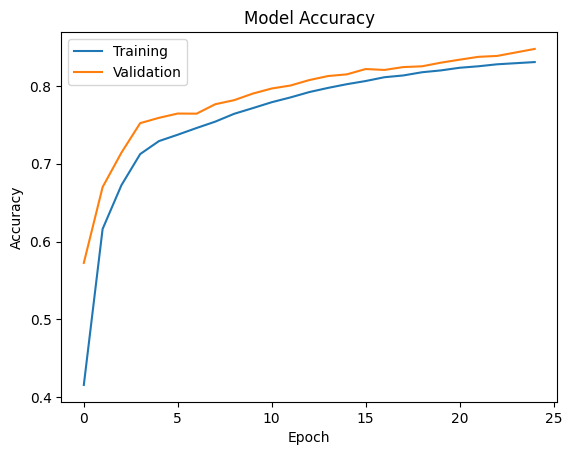

Test Loss: 0.571
Accuracy: 0.837


In [5]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, batch_size=128, epochs=25, verbose=True, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_images, test_labels, verbose=False)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

# Print test loss and accuracy
print(f'Test Loss: {loss:.3}')
print(f'Accuracy: {accuracy:.3}')


In [6]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

# Create a more complex model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer that flattens the image matrix to a vector
    Dense(128, activation='relu'),  # First hidden layer with 128 units and ReLU activation
    Dropout(0.5),                   # Dropout layer for regularization
    Dense(64, activation='relu'),   # Second hidden layer with 64 units
    Dropout(0.5),                   # Another dropout layer for regularization
    Dense(10, activation='softmax') # Output layer with 10 units for class prediction
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

# Compile the Model again

Epoch 1/50
422/422 [==============================] - 4s 8ms/step - loss: 0.7779 - accuracy: 0.7527 - val_loss: 0.1996 - val_accuracy: 0.9428
Epoch 2/50
422/422 [==============================] - 3s 7ms/step - loss: 0.3818 - accuracy: 0.8921 - val_loss: 0.1528 - val_accuracy: 0.9560
Epoch 3/50
422/422 [==============================] - 3s 7ms/step - loss: 0.3112 - accuracy: 0.9134 - val_loss: 0.1240 - val_accuracy: 0.9655
Epoch 4/50
422/422 [==============================] - 4s 10ms/step - loss: 0.2736 - accuracy: 0.9244 - val_loss: 0.1081 - val_accuracy: 0.9700
Epoch 5/50
422/422 [==============================] - 3s 7ms/step - loss: 0.2456 - accuracy: 0.9318 - val_loss: 0.1016 - val_accuracy: 0.9723
Epoch 6/50
422/422 [==============================] - 3s 7ms/step - loss: 0.2262 - accuracy: 0.9363 - val_loss: 0.0977 - val_accuracy: 0.9718
Epoch 7/50
422/422 [==============================] - 3s 8ms/step - loss: 0.2150 - accuracy: 0.9404 - val_loss: 0.0971 - val_accuracy: 0.9728
Epoch

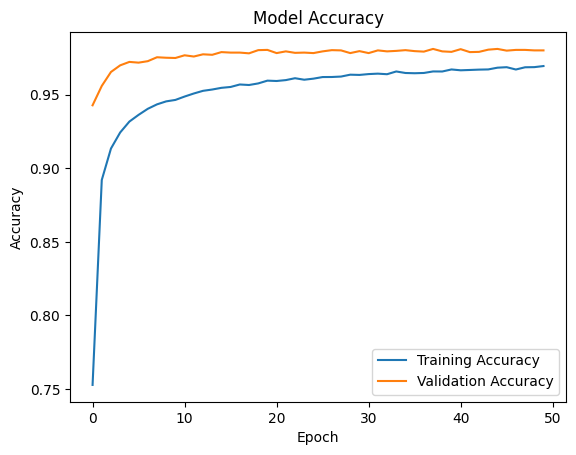

Test Loss: 0.094
Test Accuracy: 0.977


In [7]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, batch_size=128, epochs=50, verbose=True, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_images, test_labels, verbose=False)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

# Print test loss and accuracy
print(f'Test Loss: {loss:.3f}')
print(f'Test Accuracy: {accuracy:.3f}')

# C: Using Convolutions instead of all Dense Layers to train on Dataset   

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Pooling layer to reduce dimensionality
    Conv2D(64, (3, 3), activation='relu'),  # Another convolutional layer
    MaxPooling2D((2, 2)),  # Another pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Another convolutional layer
    Flatten(),  # Flatten the 3D output to 1D
    Dense(64, activation='relu'),  # Dense layer
    Dropout(0.5),  # Dropout for regularization
    Dense(10, activation='softmax')  # Output layer
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

# Compile the Convolutional Neural Netowrk

Epoch 1/25
422/422 [==============================] - 49s 111ms/step - loss: 0.4916 - accuracy: 0.8451 - val_loss: 0.0759 - val_accuracy: 0.9775
Epoch 2/25
422/422 [==============================] - 48s 113ms/step - loss: 0.1480 - accuracy: 0.9572 - val_loss: 0.0532 - val_accuracy: 0.9860
Epoch 3/25
422/422 [==============================] - 48s 115ms/step - loss: 0.1023 - accuracy: 0.9714 - val_loss: 0.0454 - val_accuracy: 0.9877
Epoch 4/25
422/422 [==============================] - 50s 118ms/step - loss: 0.0793 - accuracy: 0.9780 - val_loss: 0.0365 - val_accuracy: 0.9897
Epoch 5/25
422/422 [==============================] - 48s 114ms/step - loss: 0.0641 - accuracy: 0.9818 - val_loss: 0.0391 - val_accuracy: 0.9885
Epoch 6/25
422/422 [==============================] - 46s 108ms/step - loss: 0.0540 - accuracy: 0.9849 - val_loss: 0.0379 - val_accuracy: 0.9902
Epoch 7/25
422/422 [==============================] - 73s 172ms/step - loss: 0.0486 - accuracy: 0.9862 - val_loss: 0.0339 - val_ac

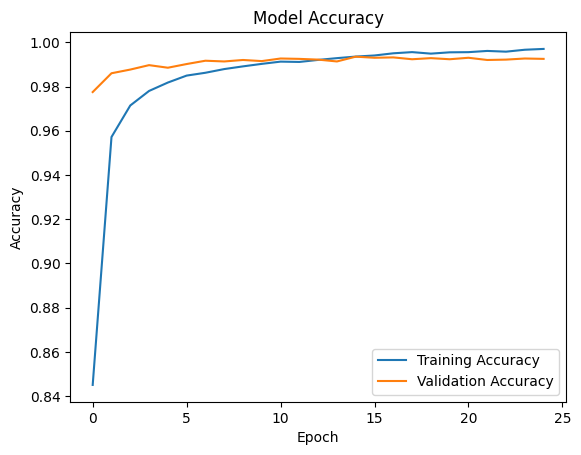

Test Loss: 0.043
Test Accuracy: 0.991


In [9]:
# Compile the CNN
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# Reshape data to fit the model
train_images_reshaped = train_images.reshape((-1, 28, 28, 1))
test_images_reshaped = test_images.reshape((-1, 28, 28, 1))

# Fit the CNN
history = model.fit(train_images_reshaped, train_labels, batch_size=128, epochs=25, verbose=True, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_images_reshaped, test_labels, verbose=False)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

# Print test loss and accuracy
print(f'Test Loss: {loss:.3f}')
print(f'Test Accuracy: {accuracy:.3f}')